# Dataset join, aggregation and pivot table

Contents this week:
 - Final project instruction I
 - Data Join
 - Web scrapping (If we have time)

Last week, we introduce `pd.concat` function to append different data vertically or horizontally. This week, we consider how to merge data based on some common columns.

In [1]:
import numpy as np
import pandas as pd

In [4]:
# DataFrame 1
df1 = pd.DataFrame({
    'ID': [2, 1, 3, 4],
    'Name': ['Bob', 'Alice', 'Charlie', 'David'],
    'Score': [90, 85, None, 88]
})

# DataFrame 2
df2 = pd.DataFrame({
    'ID': [1, 2, 3, 5],
    'Name': ['Alice', 'Bob', 'Charlie', 'Eve'],
    'Grade': ['A', 'B', None, 'C']
})

df1

,ID,Name,Score
0,2,Bob,90.0
1,1,Alice,85.0
2,3,Charlie,NaN
3,4,David,88.0


In [5]:
df2

,ID,Name,Grade
0,1,Alice,A
1,2,Bob,B
2,3,Charlie,None
3,5,Eve,C


In [6]:
pd.concat([df1,df2])

,ID,Name,Score,Grade
0,2,Bob,90.0,NaN
1,1,Alice,85.0,NaN
2,3,Charlie,NaN,NaN
3,4,David,88.0,NaN
0,1,Alice,NaN,A
1,2,Bob,NaN,B
2,3,Charlie,NaN,None
3,5,Eve,NaN,C


In [17]:
pd.concat([df1,df2], axis = 1, join ='outer')

,employee,group,employee,hire_date
0,Bob,Accounting,Lisa,2004
1,Jake,Engineering,Bob,2008
2,Lisa,Engineering,Jake,2012
3,Sue,HR,Sue,2014


Data join:

`pd.concat()`: Stack or concatenate DataFrames along an axis, useful when you just need to append or combine them without needing a key.


`df.merge()` : SQL-style join based on key columns, useful when combining DataFrames with relational data.



In [16]:
# Merging based on the 'ID' column, performing an outer join
result = df1.merge(df2, on=['ID','Name'], how='outer')

# on = [keys]

result

KeyError: 'ID'

### `merge`

When using `pd.merge`, we look for one or more matching column names between the two inputs, and uses this as the key.

In [9]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering','Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'], 'hire_date': [2004, 2008, 2012, 2014]})

In [10]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [11]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [12]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [14]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'], 'supervisor': ['Carly', 'Guido', 'Steve']})
pd.merge(df3, df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [15]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting','Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'software', 'math','spreadsheets', 'organization']})
df5

,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,software
3,Engineering,math
4,HR,spreadsheets
5,HR,organization


In [18]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [19]:
pd.merge(df1, df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,software
3,Jake,Engineering,math
4,Lisa,Engineering,software
5,Lisa,Engineering,math
6,Sue,HR,spreadsheets
7,Sue,HR,organization


Specify key columns

In [38]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [39]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Mary,2012
3,Peter,2014


In [40]:
# when key column has the same column name
pd.merge(df1, df2, on="employee")

,employee,group,hire_date
0,Bob,Accounting,2008
1,Lisa,Engineering,2004


In [41]:
# different column names
df1.columns = ["name", "group"]
df1

,name,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [42]:
pd.merge(df1, df2, left_on="name", right_on="employee")

,name,group,employee,hire_date
0,Bob,Accounting,Bob,2008
1,Lisa,Engineering,Lisa,2004


In [43]:
pd.merge(df1, df2, left_on="name", right_on="employee").drop("employee", axis=1)

,name,group,hire_date
0,Bob,Accounting,2008
1,Lisa,Engineering,2004


In [44]:
df1.columns = ["employee", "group"]
df1a = df1.set_index("employee")
df1a

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


In [45]:
df2a = df2.set_index("employee")
df2a

,hire_date
employee,
Lisa,2004
Bob,2008
Mary,2012
Peter,2014


In [46]:
pd.merge(df1a, df2a, left_index=True, right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Lisa,Engineering,2004


Different types of merge

In [29]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [30]:
df2 = pd.DataFrame({"employee": ["Lisa", "Bob", "Mary", "Peter"], "hire_date":[2004, 2008, 2012, 2014]})
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Mary,2012
3,Peter,2014


In [31]:
pd.merge(df1, df2)

,employee,group,hire_date
0,Bob,Accounting,2008
1,Lisa,Engineering,2004


In [32]:
pd.merge(df1, df2, how="inner")

,employee,group,hire_date
0,Bob,Accounting,2008
1,Lisa,Engineering,2004


Other options for the `how` keyword are `outer`, `left`, and `right`.
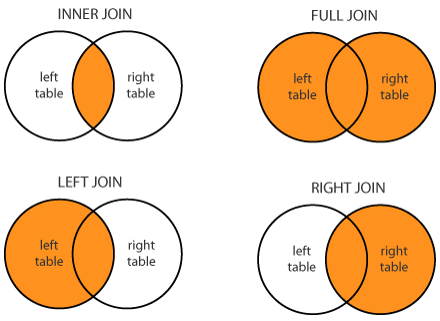

In [34]:
pd.merge(df1, df2, how="outer")

,employee,group,hire_date
0,Bob,Accounting,2008.0
1,Jake,Engineering,NaN
2,Lisa,Engineering,2004.0
3,Sue,HR,NaN
4,Mary,NaN,2012.0
5,Peter,NaN,2014.0


In [35]:
pd.merge(df1, df2, how="left")

,employee,group,hire_date
0,Bob,Accounting,2008.0
1,Jake,Engineering,NaN
2,Lisa,Engineering,2004.0
3,Sue,HR,NaN


In [36]:
pd.merge(df1, df2, how="right")

,employee,group,hire_date
0,Lisa,Engineering,2004
1,Bob,Accounting,2008
2,Mary,NaN,2012
3,Peter,NaN,2014


## Aggregation

In [ ]:
df = pd.read_csv("iris.csv")
df

In [ ]:
df.mean(numeric_only = True)

In [ ]:
df.mean(axis=1, numeric_only = True)

### Groupby: split, apply, combine

- `split` breaks up and groups a DataFrame depending on the value of the specified key.
- `apply` computes some function, usually an aggregate, transformation, or filtering, within the individual groups.
- `combine` merges the results of these operations into an output array.

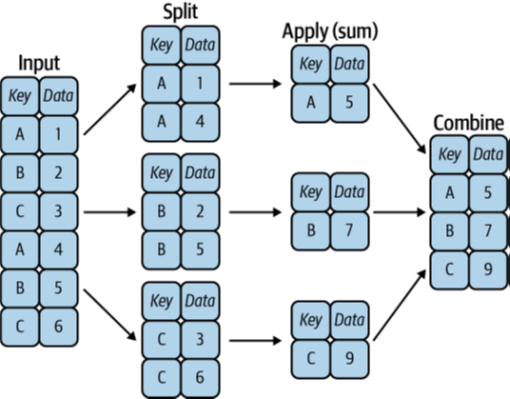

In [ ]:
df.groupby("species").sum()

In [ ]:
df.groupby("species")["petal_width"].mean(numeric_only = True)

In [ ]:
df.groupby("species")["petal_width"].median()

In [ ]:
df.groupby("species").aggregate(["min", "median", "max", 'count'])

In [ ]:
df.groupby('species').aggregate({'sepal_length': ['min', 'max'],'sepal_width': 'mean'})

In [ ]:
df.groupby('species').filter(lambda x: x["sepal_length"].mean() > 6)

In [ ]:
df.groupby("species").transform("mean")

In [ ]:
df.groupby("species").transform(lambda x: x-x.mean())

In [ ]:
df.groupby("species").apply(np.mean)

In [ ]:
df.groupby("species").apply(lambda x:x["sepal_length"]/x["sepal_length"].max(),include_groups=False)

In [ ]:
df.groupby("species")["sepal_length"].apply(lambda x: x/x.max())

## Pivot table

In [ ]:
df = pd.read_csv("titanic.csv")
df

In [ ]:
df.groupby(['sex', 'pclass'])['survived'].aggregate('mean')

In [ ]:
df.groupby(['sex', 'pclass'])['survived'].aggregate('mean').unstack()

In [ ]:
df.pivot_table('survived', index='sex', columns='pclass', aggfunc='mean')

In [ ]:
age = pd.cut(df['age'], [0, 18, 80])
df.pivot_table('survived', ['sex', age], 'pclass', observed=False)

In [ ]:
fare = pd.qcut(df['fare'], 2)
df.pivot_table('survived', ['sex', age], [fare, 'pclass'])

# In-class activity: 

You are provided with three tables: a `Class Table`, an `Enrollment Table`, and a `Student Table`. 

Solve two subproblems: 
- 1) Calculate the **average class size** for each student, based on the courses they are enrolled in.
- 2) Calculate the **average GPA** of students for each instructor, considering that one instructor may teach multiple courses. 

In [49]:
# Class Table
class_df = pd.DataFrame({
    'Course_ID': ['STOR101', 'STOR102', 'STOR103', 'STOR104', 'STOR105'],
    'Instructor': ['Dr. Smith', 'Dr. Jones', 'Dr. Adams', 'Dr. Brown', 'Dr. Smith'],
    'Class_Size': [30, 25, 20, 15, 50]
})
class_df

,Course_ID,Instructor,Class_Size
0,STOR101,Dr. Smith,30
1,STOR102,Dr. Jones,25
2,STOR103,Dr. Adams,20
3,STOR104,Dr. Brown,15
4,STOR105,Dr. Smith,50


In [47]:
# Enrollment Table
enroll_df = pd.DataFrame({
    'Student_ID': [101, 102, 103, 101, 104, 105, 106, 102],
    'Course_ID': ['STOR101', 'STOR101', 'STOR102', 'STOR102', 'STOR103', 'STOR104', 'STOR105','STOR104'],
})
enroll_df

,Student_ID,Course_ID
0,101,STOR101
1,102,STOR101
2,103,STOR102
3,101,STOR102
4,104,STOR103
5,105,STOR104
6,106,STOR105
7,102,STOR104


In [48]:
# Student Table (with GPA)
student_gpa_df = pd.DataFrame({
    'Student_ID': [101, 102, 103, 104, 105, 106],
    'GPA': [3.5, 3.2, 3.8, 3.7, 3.0, 3.6]
})
student_gpa_df

,Student_ID,GPA
0,101,3.5
1,102,3.2
2,103,3.8
3,104,3.7
4,105,3.0
5,106,3.6


In [50]:
# merge student_gpa_df and enroll_df
gpa_enroll_df = pd.merge(enroll_df, student_gpa_df, how="left")
gpa_enroll_df

,Student_ID,Course_ID,GPA
0,101,STOR101,3.5
1,102,STOR101,3.2
2,103,STOR102,3.8
3,101,STOR102,3.5
4,104,STOR103,3.7
5,105,STOR104,3.0
6,106,STOR105,3.6
7,102,STOR104,3.2


In [52]:
# connect course info to course ids
df = pd.merge(gpa_enroll_df, class_df, how="left")
df

,Student_ID,Course_ID,GPA,Instructor,Class_Size
0,101,STOR101,3.5,Dr. Smith,30
1,102,STOR101,3.2,Dr. Smith,30
2,103,STOR102,3.8,Dr. Jones,25
3,101,STOR102,3.5,Dr. Jones,25
4,104,STOR103,3.7,Dr. Adams,20
5,105,STOR104,3.0,Dr. Brown,15
6,106,STOR105,3.6,Dr. Smith,50
7,102,STOR104,3.2,Dr. Brown,15


In [60]:
df.groupby("Student_ID").mean(numeric_only=True)

,GPA,Class_Size
Student_ID,,
101,3.5,27.5
102,3.2,22.5
103,3.8,25.0
104,3.7,20.0
105,3.0,15.0
106,3.6,50.0


In [ ]:
df.groupby("Instructor").mean(numeric_only=True)